# Part I - (Prosper Bank Loan Exploratory Analysis)
## by (Cady Wilson)

## Introduction
> Introduce the dataset

>**Rubric Tip**: Your code should not generate any errors, and should use functions, loops where possible to reduce repetitive code. Prefer to use functions to reuse code statements.

> **Rubric Tip**: Document your approach and findings in markdown cells. Use comments and docstrings in code cells to document the code functionality.

>**Rubric Tip**: Markup cells should have headers and text that organize your thoughts, findings, and what you plan on investigating next.  



## Preliminary Wrangling


In [106]:
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set_style("darkgrid")
colors = sns.color_palette()

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [37]:
#I fixed some of the issues in Excel beforehand for easier analysis.
df = pd.read_csv(r"C:\Users\Cady\Desktop\Udacity\Bank_Loans\LoanData.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 82 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

### What is the structure of your dataset?

> I started as 113,937 loans with 81 columns. I trimmed it down to just 21 features and 113,066 after dropping the duplicate rows.

### What is/are the main feature(s) of interest in your dataset?

##### Add the definitions later

LoanStatus, BorrowerAPR, EmploymentStatus, StatedMonthlyIncome, 
IncomeVerifiable, DebtToIncomeRatio, LoanOriginalAmount, and Term.
        
I'm interested to see how social aspects like occupation and credit score affect the loan. i.e. Do the rich get richer while the poor ...stay poor. 


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

Occupation, EmploymentStatusDuration, IsBorrowerHomeowner, IncomeRange, BorrowerState, ListingCatergory, and CreditScoreRangeLower/CreditScoreRangeUpper.

## Qualtiy/Tidyness Check

#### Things that need fixed:
- Too many variables, isolate just the columns being explored.
- Check for any duplicate data
- ProsperRating and IncomeRange should be catergorical datatypes
-ListingCatergory and ProsperRatings can have easier column names
- Listing Catergories titles could be stored better, like in a dictionary
-NotEmployed could just be replaced with 0 for easier graphing later


In [134]:
isolates = ['ListingKey', 'ListingCreationDate', 'Occupation', 'ListingCategory', 'ListingCategoryNumber', 'BorrowerState', 'IsBorrowerHomeowner',
                'IncomeRange', 'IncomeVerifiable', 'DebtToIncomeRatio', 'EmploymentStatusDuration', 'StatedMonthlyIncome', 'Term', 'ProsperRatingLetter', 'ProsperRatingNumber',
                'EmploymentStatus', 'LoanStatus', 'LoanOriginalAmount', 'BorrowerAPR', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'EstimatedReturn', 'BorrowerRate']

In [135]:
#Always make a copy of the data
main = df.copy()

In [136]:
main = main[isolates]

In [86]:
main.info()
#There are a few metrics that do not contain the same number of entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ListingKey                113937 non-null  object 
 1   ListingCreationDate       113937 non-null  object 
 2   Occupation                110349 non-null  object 
 3   ListingCategory           96972 non-null   object 
 4   ListingCategoryNumber     113937 non-null  int64  
 5   BorrowerState             108422 non-null  object 
 6   IsBorrowerHomeowner       113937 non-null  bool   
 7   IncomeRange               113937 non-null  object 
 8   IncomeVerifiable          113937 non-null  bool   
 9   DebtToIncomeRatio         105383 non-null  float64
 10  EmploymentStatusDuration  106312 non-null  float64
 11  StatedMonthlyIncome       113937 non-null  float64
 12  Term                      113937 non-null  int64  
 13  ProsperRatingLetter       84853 non-null   o

In [137]:
#Check for and drop duplicate entries.
main.duplicated().value_counts()

False    113066
True        871
dtype: int64

In [138]:
main = main.drop_duplicates()
main.duplicated().value_counts()

False    113066
dtype: int64

In [139]:
#ListingCreationDate should be a datetime object.
main.ListingCreationDate = pd.to_datetime(df.ListingCreationDate)

In [140]:
#CreditScoreRangeLower, CreditScoreRangeUpper, ProsperRatingNumber, 
#and EmploymentStatusDuration should all be int.
int_list = ['CreditScoreRangeLower', 'CreditScoreRangeUpper', 'ProsperRatingNumber', 'EmploymentStatusDuration'] 
main[int_list] = main[int_list].astype('Int64')

In [143]:
#turn "Not Available" in employment status to NaN values
main['EmploymentStatus'] = main['EmploymentStatus'].replace('Not available', float('nan'))

In [97]:
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   ListingKey                113066 non-null  object        
 1   ListingCreationDate       113066 non-null  datetime64[ns]
 2   Occupation                109537 non-null  object        
 3   ListingCategory           96101 non-null   object        
 4   ListingCategoryNumber     113066 non-null  int64         
 5   BorrowerState             107551 non-null  object        
 6   IsBorrowerHomeowner       113066 non-null  bool          
 7   IncomeRange               113066 non-null  category      
 8   IncomeVerifiable          113066 non-null  bool          
 9   DebtToIncomeRatio         104594 non-null  float64       
 10  EmploymentStatusDuration  105441 non-null  Int64         
 11  StatedMonthlyIncome       113066 non-null  float64       
 12  Te

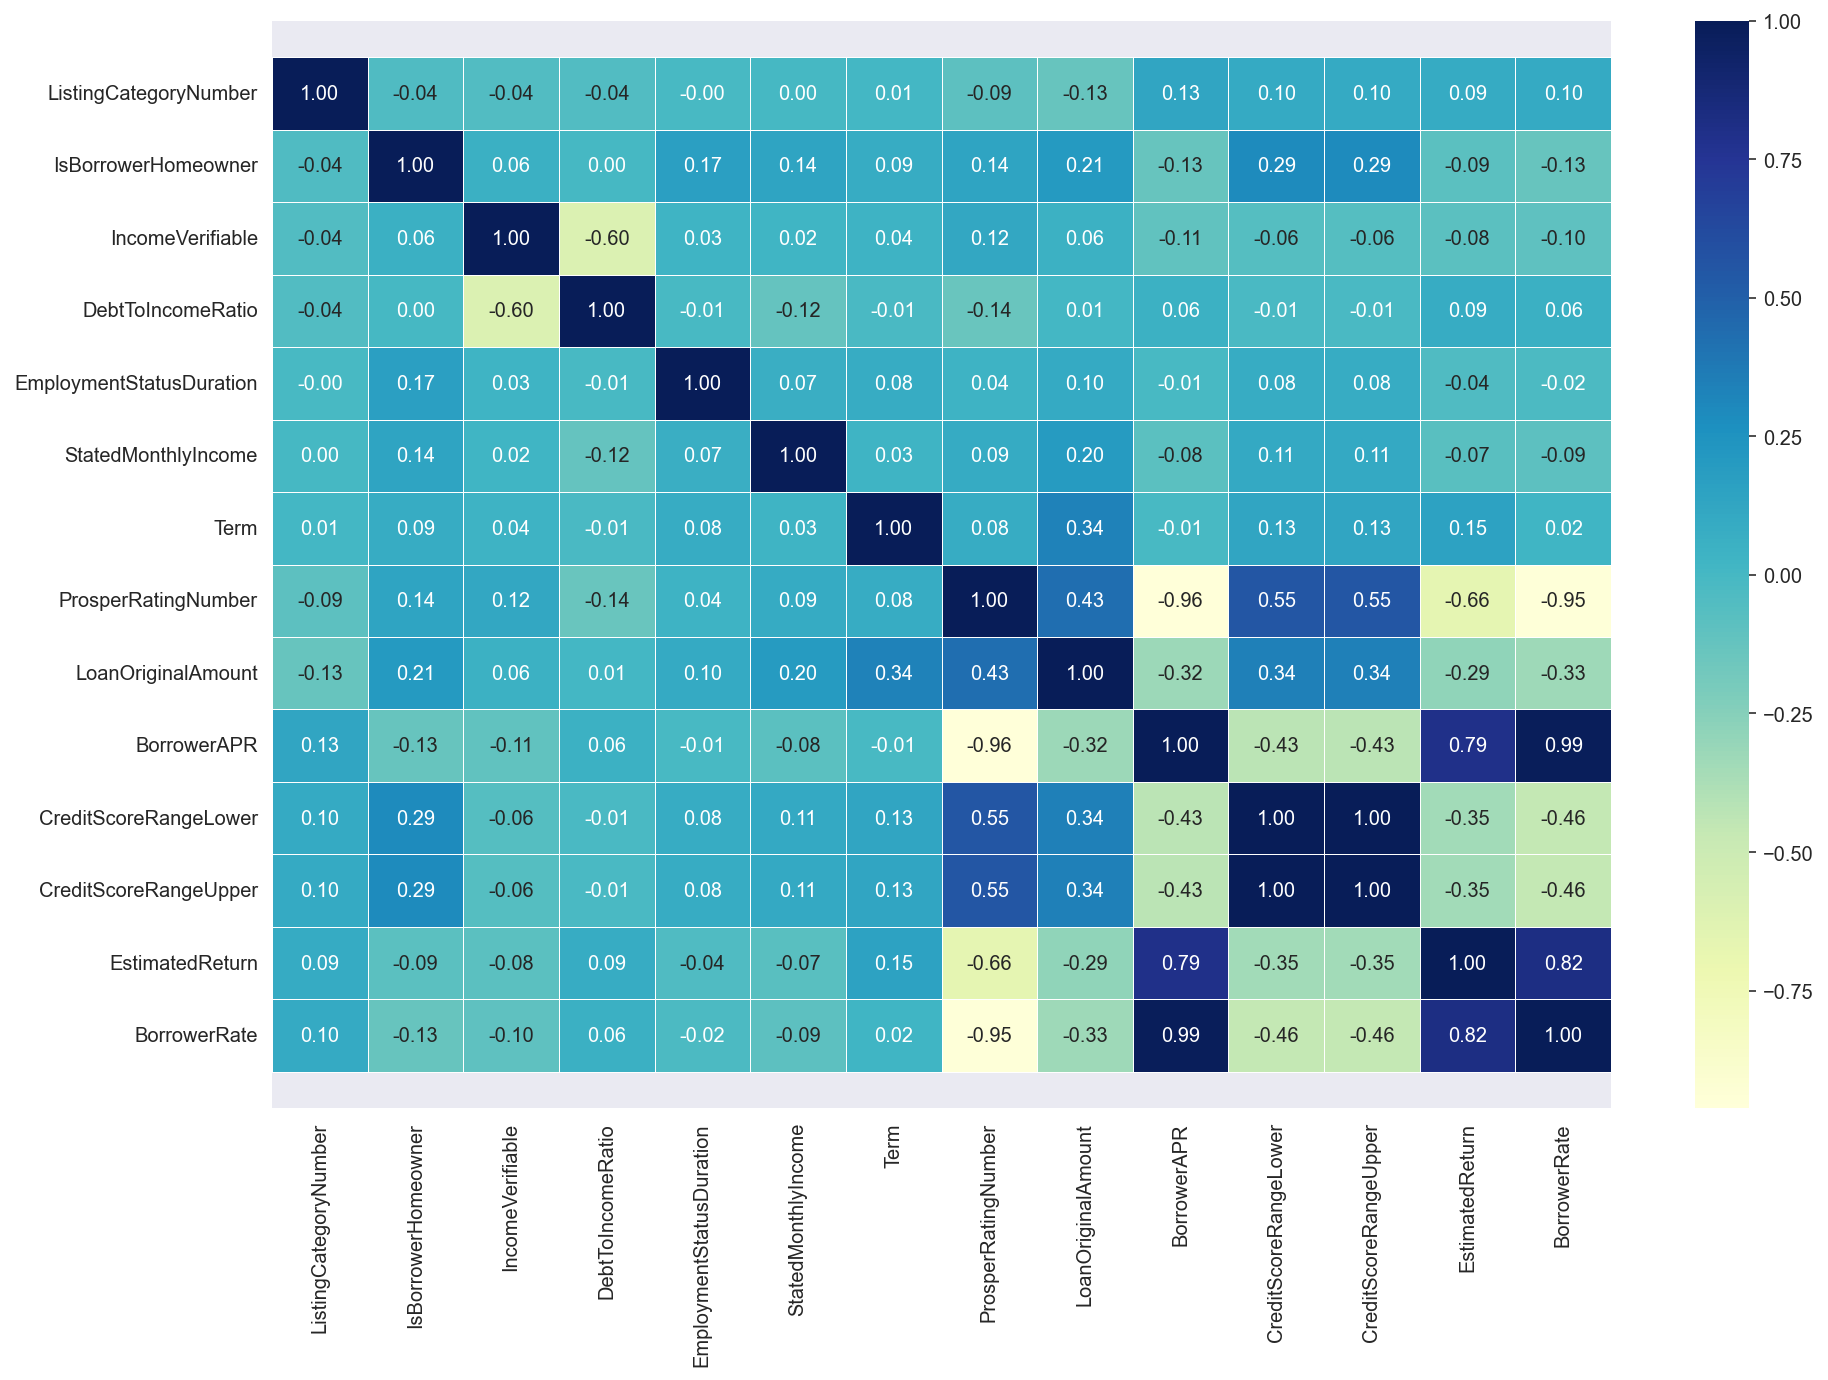

In [144]:
#Using correlation to see if perhaps threre is something I should hone in on in the exploration.
corr_matrix = main.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5);

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.


> **Rubric Tip**: The project (Parts I alone) should have at least 15 visualizations distributed over univariate, bivariate, and multivariate plots to explore many relationships in the data set.  Use reasoning to justify the flow of the exploration.



>**Rubric Tip**: Use the "Question-Visualization-Observations" framework  throughout the exploration. This framework involves **asking a question from the data, creating a visualization to find answers, and then recording observations after each visualisation.** 


## Question: What is the Distribution of Borrower APR?

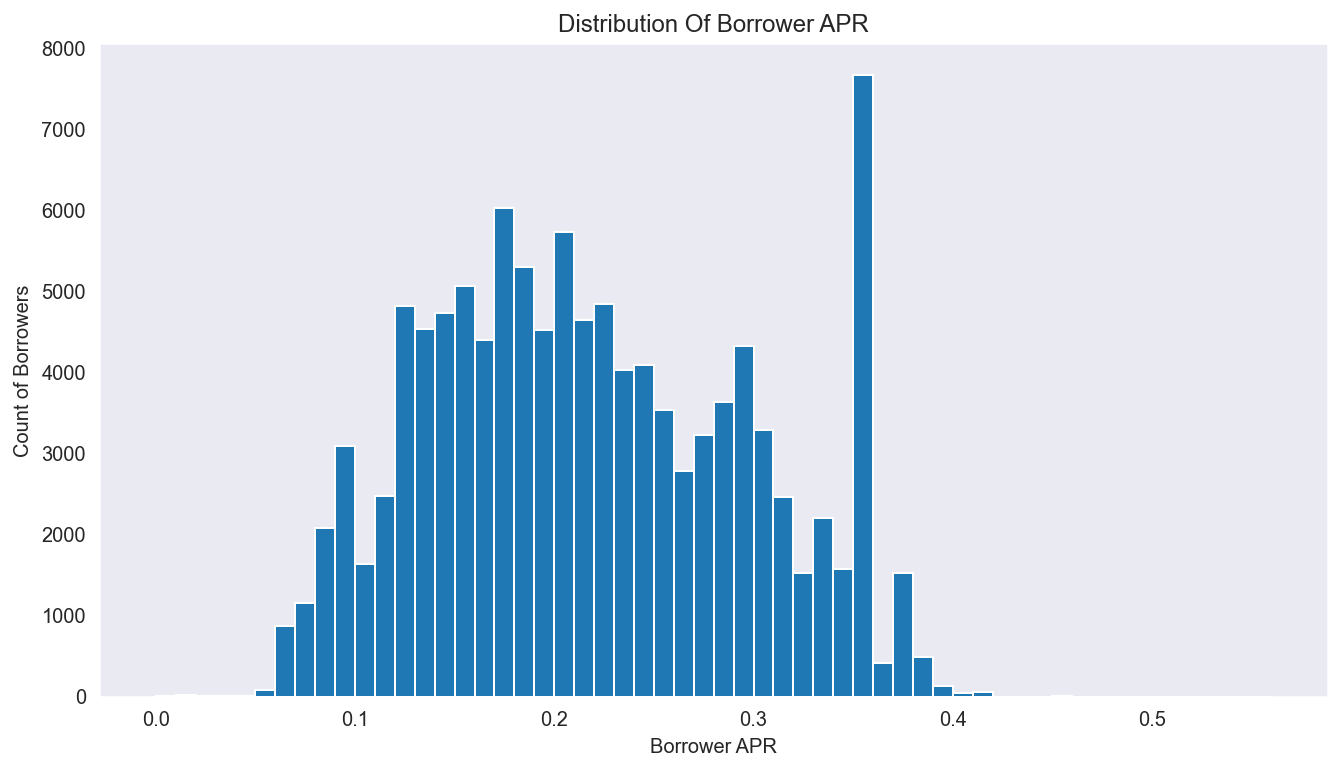

In [162]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 11, 6
bins = np.arange(0, main.BorrowerAPR.max() + 0.05, 0.01)
plt.hist(data = main, x = 'BorrowerAPR', bins = bins)
plt.xlabel('Borrower APR')
plt.ylabel('Count of Borrowers')
plt.title('Distribution Of Borrower APR')
plt.grid(False);

It appears to be pretty evenly distributed, however it could be considered multimodal as there are a few different spikes on APR rates. The highest spike being around 3.6 percent.

## Question: What is the distribution of Borrower Incomes?

In [146]:
main['IncomeRange'].replace(['Not employed', 'Not displayed'], '$0', inplace = True)
# create some categories for income
income = ['$100,000+', '$75,000-99,999', '$50,000-74,999', '$25,000-49,999', '$1-24,999', '$0']
variable = pd.api.types.CategoricalDtype(ordered = True, categories = income)
main['IncomeRange'] = main['IncomeRange'].astype(variable)

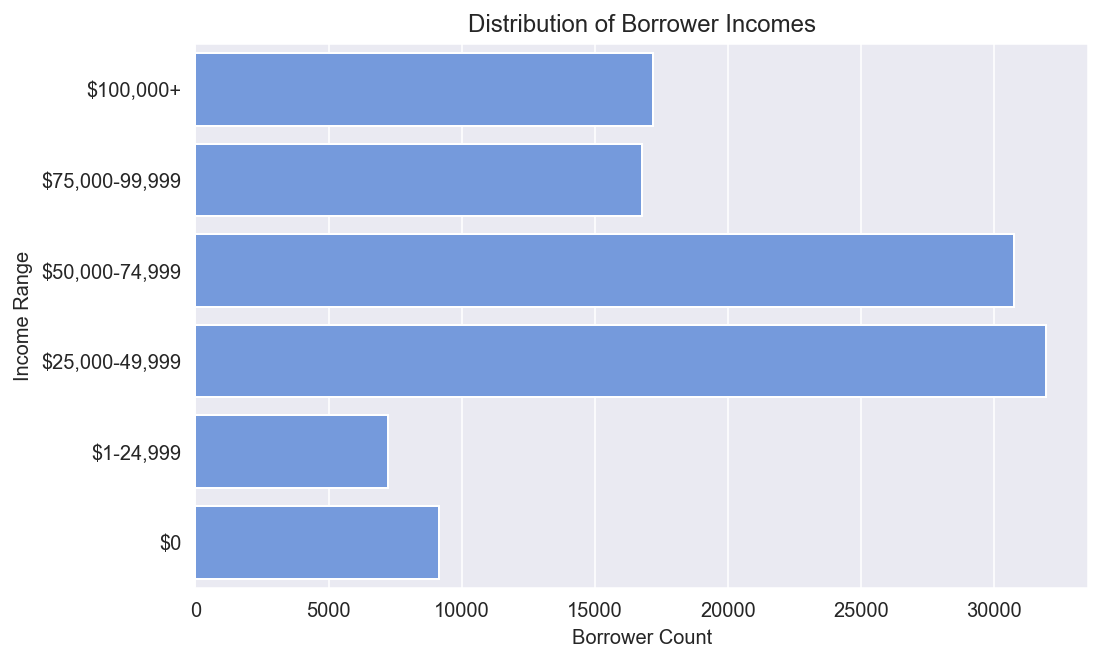

In [147]:
plt.figure(figsize = [8, 5])
sns.countplot(data = main, y = 'IncomeRange', color='cornflowerblue')
plt.ylabel('Income Range')
plt.xlabel('Borrower Count')
plt.title('Distribution of Borrower Incomes');

Typical salaries are in the mid-range for borrowers. This makes sense as this is typically the lower and lower-middle class range in the United States. Borrowers with less money to start would need a loan far more than someone who makes six figures.

## Question: What is the typical Debt to Income Ratio?

In [51]:
main.DebtToIncomeRatio.describe()

count    104594.000000
mean          0.276032
std           0.553738
min           0.000000
25%           0.140000
50%           0.220000
75%           0.320000
max          10.010000
Name: DebtToIncomeRatio, dtype: float64

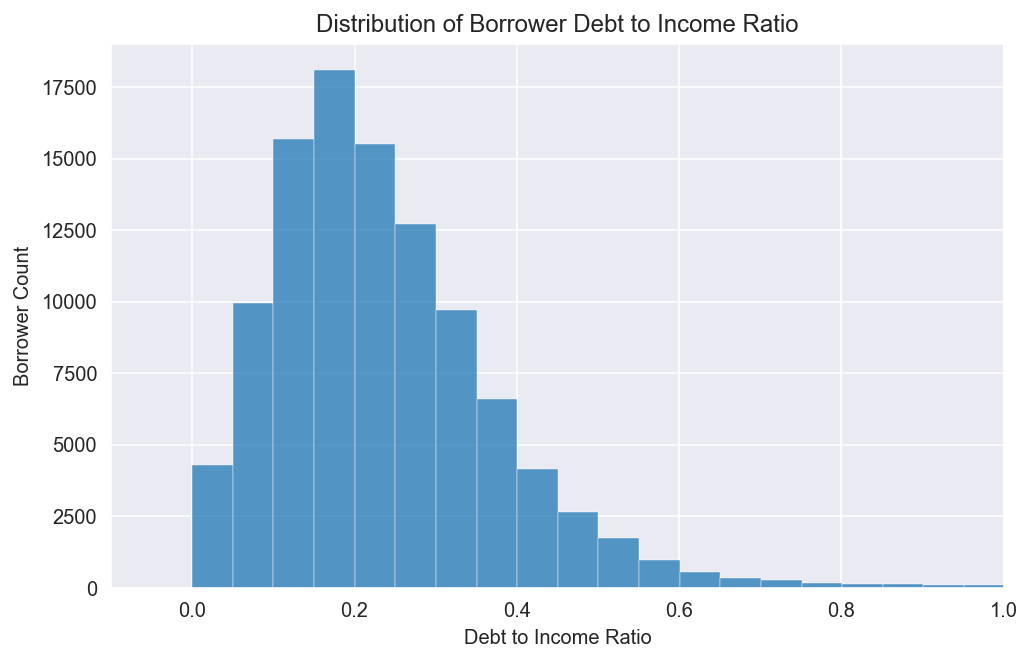

In [148]:
plt.figure(figsize = [8,5])
sns.histplot(main.DebtToIncomeRatio, kde = False, bins = 200)
plt.xlim(-.1, 1)
plt.xlabel('Debt to Income Ratio')
plt.ylabel('Borrower Count')
plt.title('Distribution of Borrower Debt to Income Ratio');

It looks like the most borrowers have a debt to income ratio of about 20%. It's skewed to the right. 

## What is the typical loan taken out for?

In [53]:
why = main.ListingCategory.value_counts().sort_values(ascending = True)
why

RV                       52
Green Loans              58
Boat                     85
Cosmetic Procedure       91
Baby or Adoption        196
Engagement Ring         214
Motorcylce              304
Student Use             756
Wedding Loans           762
Vacation                764
Large Purchase          863
Taxes                   882
Medical or Dental      1507
Household Expenses     1987
Personal Loan          2395
Auto                   2568
Business               7157
Home Improvement       7388
Other                 10448
Debt Consolidation    57624
Name: ListingCategory, dtype: int64

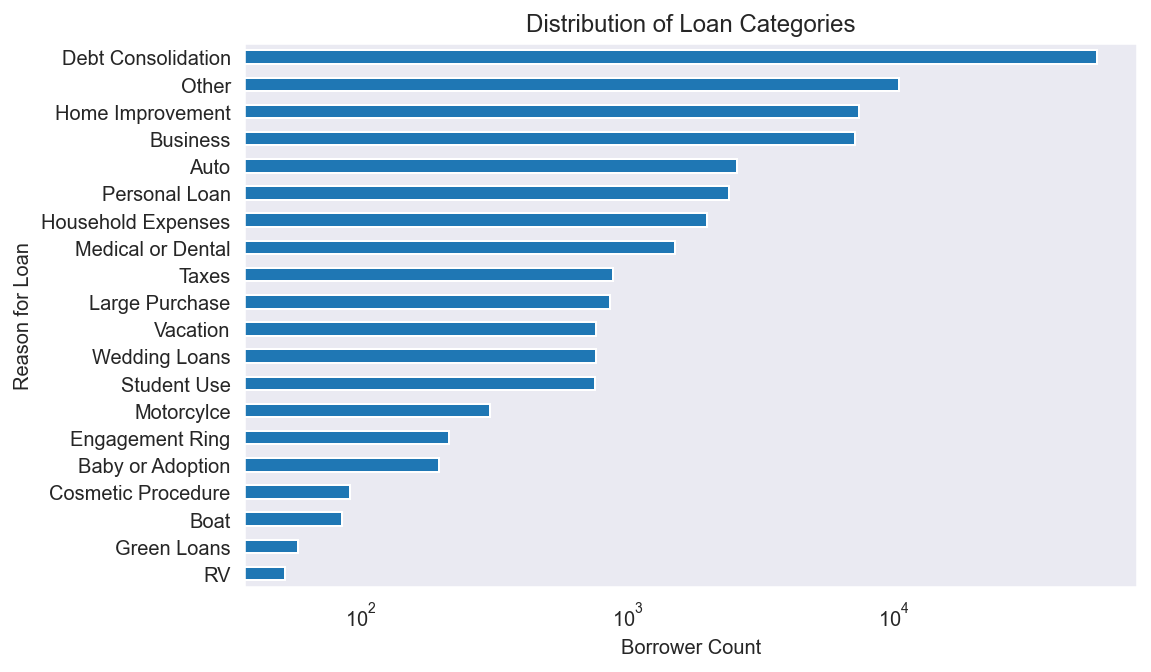

In [149]:
rcParams['figure.figsize'] = 8, 5
why.plot(kind = 'barh', grid = False)
plt.ylabel('Reason for Loan')
plt.xlabel('Borrower Count')
plt.title('Distribution of Loan Categories')
plt.xscale('log');

It is clear, and also a bit sad, that the biggest reason for taking out a loan is to consolidate debt. This takes all the debt a borrower has and rolls it into one payment paid to the servicer. Essentially paying debt with more debt, but at a better interst rate.

## Question: What is the distribution of the Credit Grades given?

In [55]:
main.ProsperRatingLetter.value_counts()

C     18096
B     15368
A     14390
D     14170
E      9716
HR     6917
AA     5325
Name: ProsperRatingLetter, dtype: int64

In [158]:
#Categories
letters = ['AA', 'A', 'B', 'C', 'D', 'E']
varies = pd.api.types.CategoricalDtype(ordered = True, categories = letters)
main['ProsperRatingLetter'] = main['ProsperRatingLetter'].astype(varies)

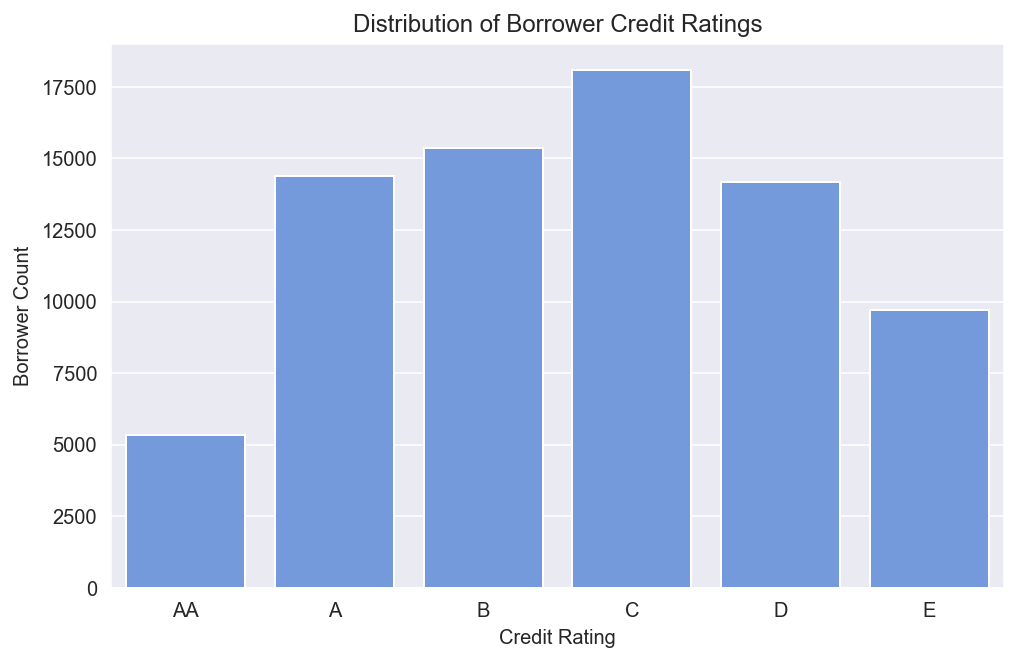

In [151]:
plt.figure(figsize = [8, 5])
sns.countplot(data = main, x = 'ProsperRatingLetter', color='cornflowerblue')
plt.xlabel('Credit Rating')
plt.ylabel('Borrower Count')
plt.title('Distribution of Borrower Credit Ratings');

It looks like the majority of borrowers have less than stellar credit. It would be interesting to cross tab these with debt to income ratios.

## Question: What does the typical loan status look like?

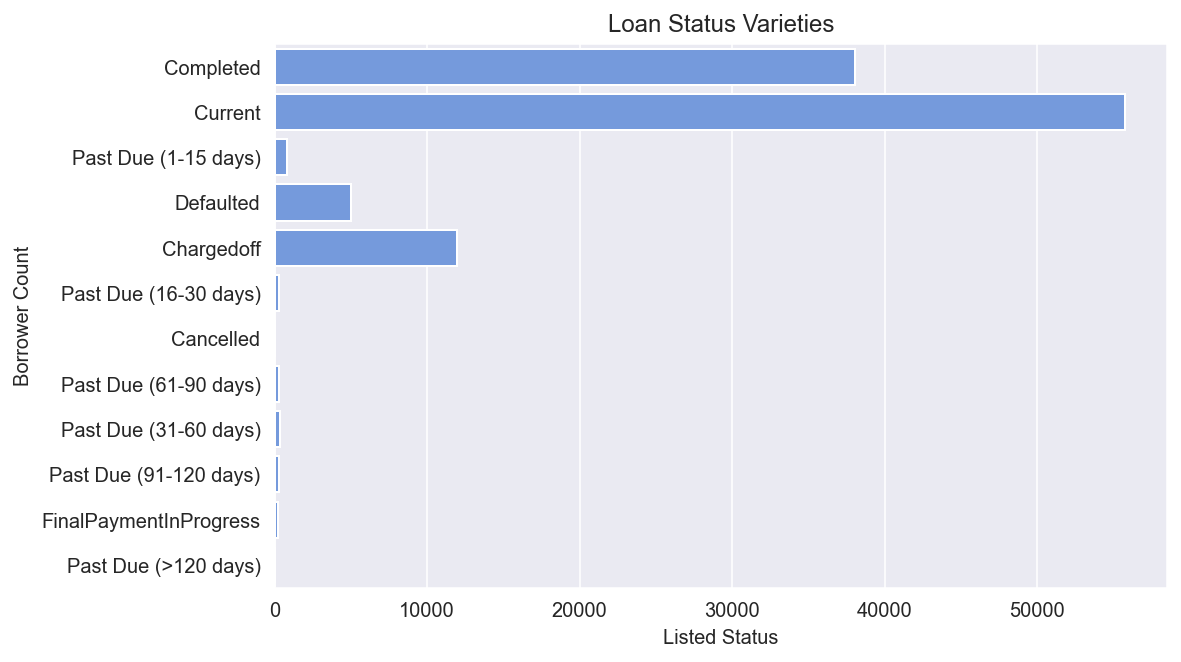

In [152]:
plt.figure(figsize = [8, 5])
sns.countplot(data = main, y = 'LoanStatus', color='cornflowerblue')
plt.xlabel('Listed Status')
plt.ylabel('Borrower Count')
plt.title('Loan Status Varieties');

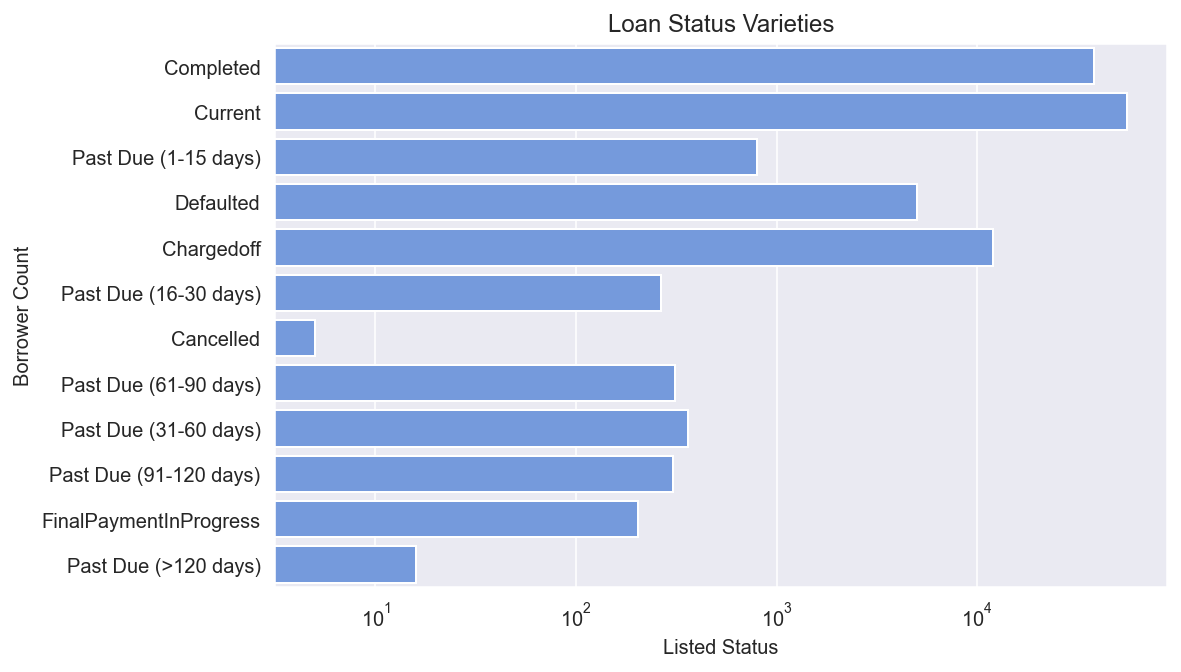

In [153]:
#Much easier to view in log scale.
plt.figure(figsize = [8, 5])
sns.countplot(data = main, y = 'LoanStatus', color='cornflowerblue')
plt.xlabel('Listed Status')
plt.ylabel('Borrower Count')
plt.title('Loan Status Varieties')
plt.xscale('log');

Most borrowers are still paying their loans and on time. Only a few (comparatively) borrowers are past due on thier loans. The charged off and defauled categories are larger than expected, I would Prosper would hold on as long as possible to get their money's worth.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I was a bit suprised to see people with six-figure incomes taking out loans. It would definitely be intersting to perhaps see for what. It was unsuprising however that many people with less than stellar credit are the ones taking out loans. Combined with the debt consolidation loan numbers I can probably guess why that would be. It'll be interesting to explore the relationship later.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> I adjusted some of my data into categories for easier visual analysis. But never changed any of the data itself. As for unusual features nothing really jumped out at me. It was pretty standard based on the assumptions I had about the borrower's data.

## Bivariate Exploration

## Question: What is the relationship between credit rating and borrower income?

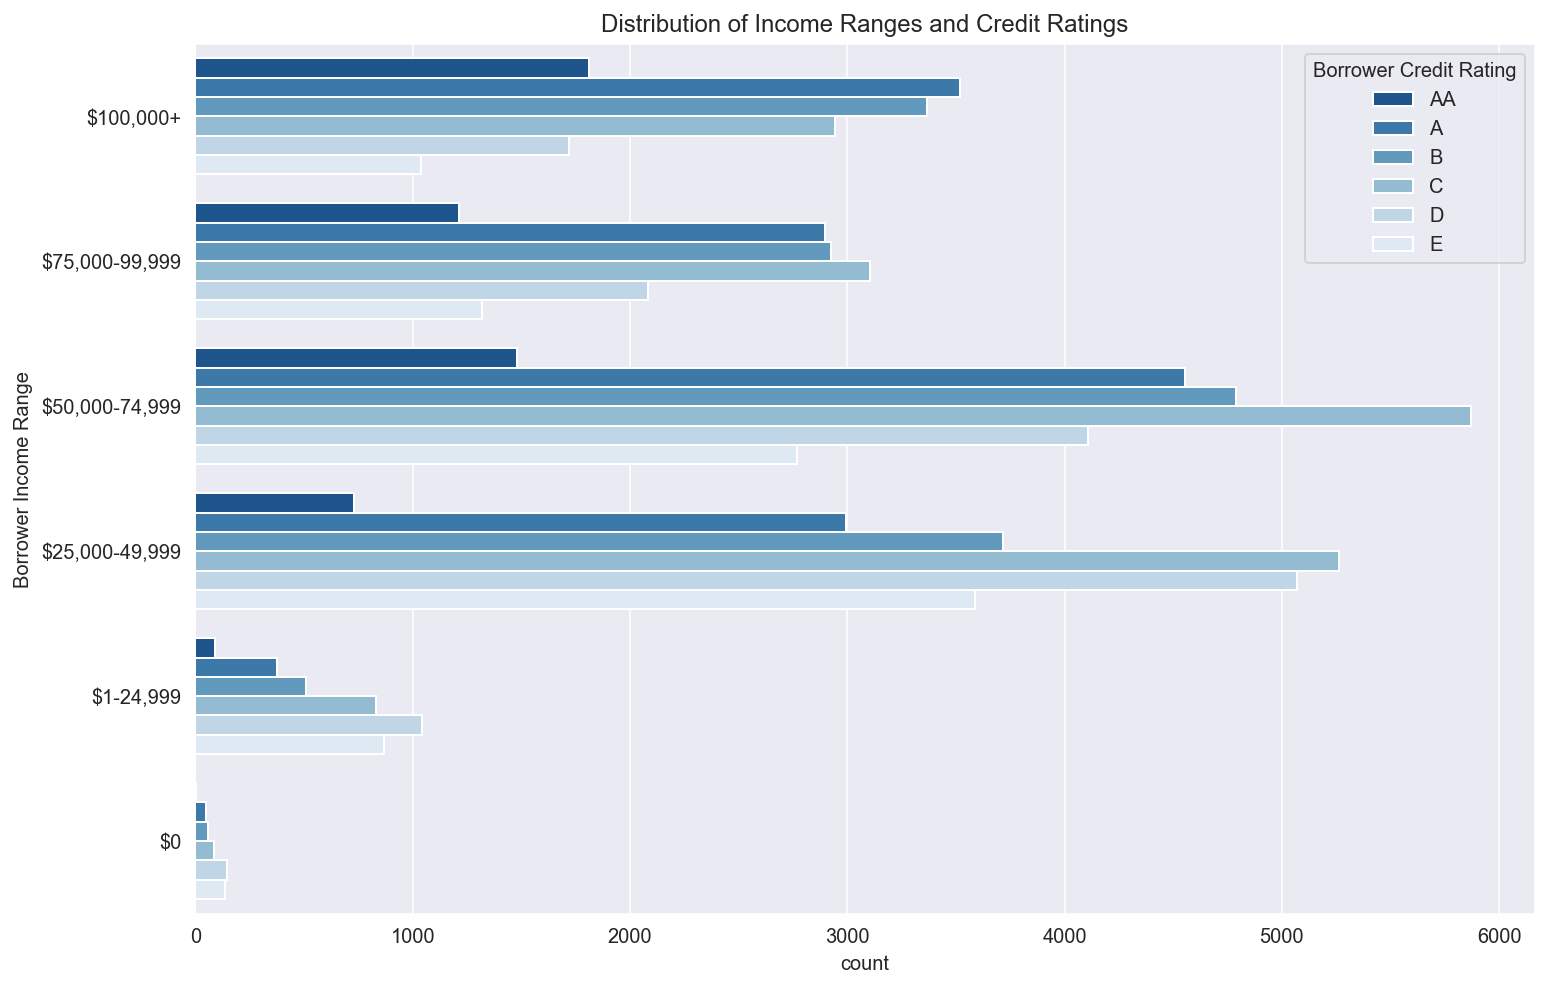

In [154]:
plt.figure(figsize = [12,8])

ax = sns.countplot(data = main, y = 'IncomeRange', hue = 'ProsperRatingLetter',
                   palette = 'Blues_r')

ax.legend(title = 'Borrower Credit Rating')
plt.title('Distribution of Income Ranges and Credit Ratings')
plt.ylabel('Borrower Income Range');

While I'm not suprised that the mid range incomes have mid range credit scores, I am suprised at how many six-figure earners also have bad credit ratings. The AA credit rating made sense to me, the more money the easier it is to have good credit. But the variation in the lesser grades is unexpexted.

In [155]:
num = ['BorrowerAPR', 'Term', 'DebtToIncomeRatio', 'LoanOriginalAmount']
cat = ['LoanStatus', 'ProsperRatingLetter', 'IncomeRange', 'ListingCategory']
main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113066 entries, 0 to 113936
Data columns (total 23 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   ListingKey                113066 non-null  object        
 1   ListingCreationDate       113066 non-null  datetime64[ns]
 2   Occupation                109537 non-null  object        
 3   ListingCategory           96101 non-null   object        
 4   ListingCategoryNumber     113066 non-null  int64         
 5   BorrowerState             107551 non-null  object        
 6   IsBorrowerHomeowner       113066 non-null  bool          
 7   IncomeRange               113066 non-null  category      
 8   IncomeVerifiable          113066 non-null  bool          
 9   DebtToIncomeRatio         104594 non-null  float64       
 10  EmploymentStatusDuration  105441 non-null  Int64         
 11  StatedMonthlyIncome       113066 non-null  float64       
 12  Te

## Question: Is there a correlation between all the key numerical variables?

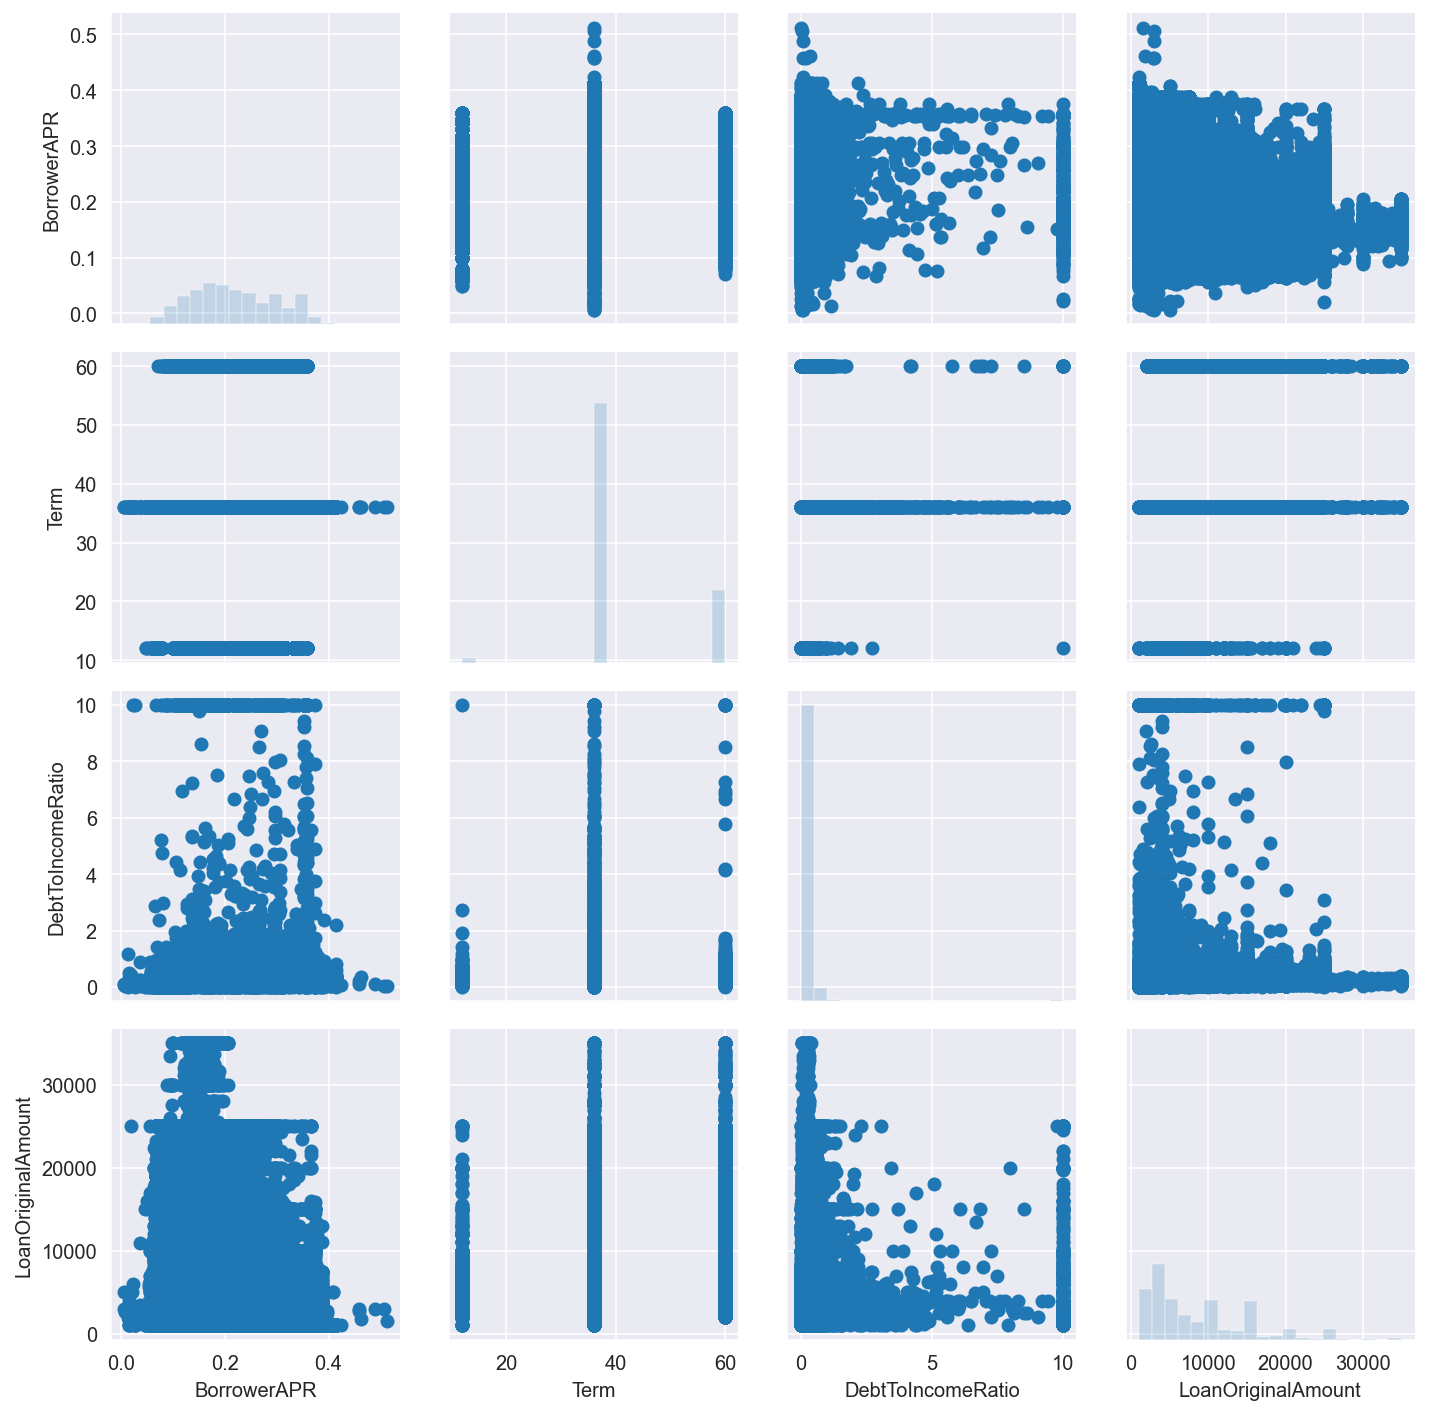

In [62]:
g = sns.PairGrid(data = main, vars = num)
g = g.map_diag(plt.hist, bins = 20, alpha=.2);
g.map_offdiag(plt.scatter);

There isn't much of a correlation to see in loan terms as there are only 3 values. But there appears to be a negative correlation between both debt to income ratio and loan amount and Loan amount and APR. Interesting to note that there is a strong line of APR no matter the debt to income ratio at around the 3.5% APR mark. Perhaps that is a starting point for Prospers loan terms.

## Question: What are the Relationships between the Borrower APR and numerical features?  And are there any outliers?

<Figure size 720x720 with 0 Axes>

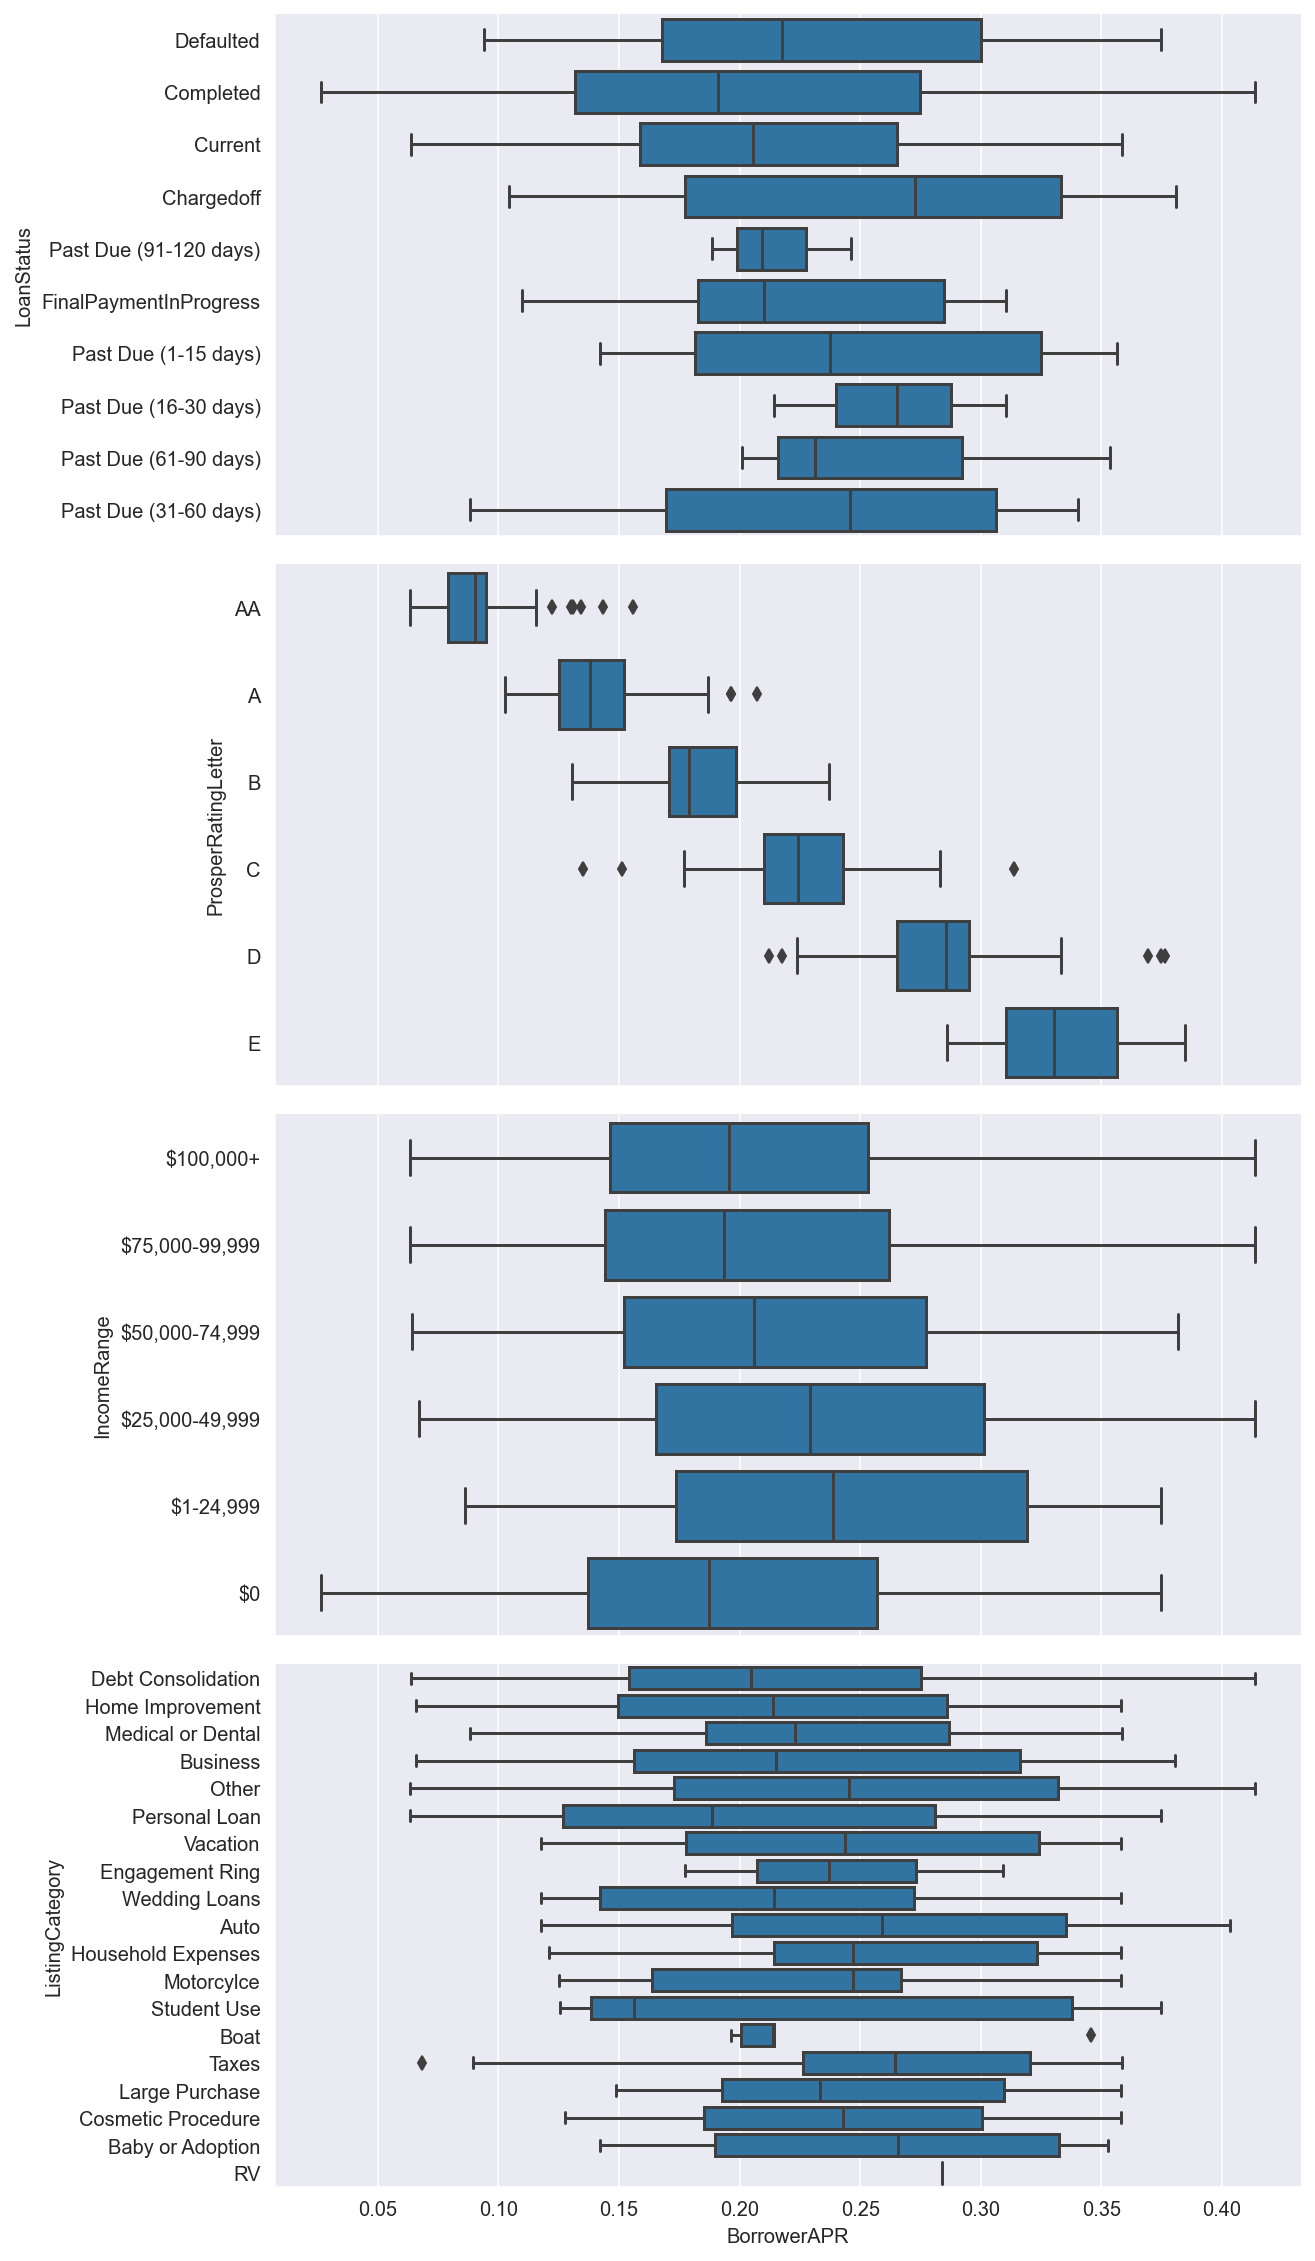

In [156]:
loan_samp = main.sample(n=2000, replace = False)

def boxgrid(x, y, **kwargs):
    default_color = sns.color_palette()[0]
    sns.boxplot(x=x, y=y, color=default_color)

plt.figure(figsize = [10, 10])
g = sns.PairGrid(data = loan_samp, y_vars = cat, x_vars = ['BorrowerAPR'],
                height = 4, aspect = 2)
g.map(boxgrid)
plt.show();

The plot I was most interested in was the relationship specifically between credit rating and APR. It alsmost seems predatory that the APR is so much higher for borrowers whose credit scores are not ideal.
The income range and APR is almost even, as if the income amount has little to do with the calculation for the APR.

## How does the actual relatioship compare to the sample?

<Figure size 720x576 with 0 Axes>

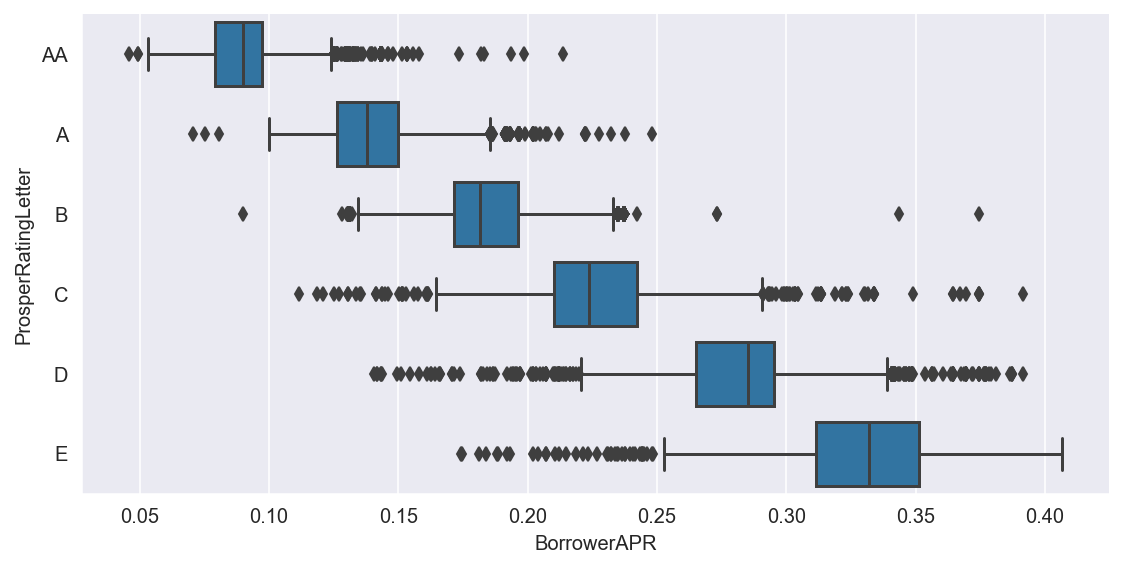

In [157]:
def boxgrid(x, y, **kwargs):
    default_color = sns.color_palette()[0]
    sns.boxplot(x=x, y=y, color=default_color)

plt.figure(figsize = [10, 8])
g = sns.PairGrid(data = main, y_vars = ['ProsperRatingLetter'], x_vars = ['BorrowerAPR'],
                height = 4, aspect = 2)
g.map(boxgrid)
plt.show();

As I assumed, it's almost exactly the same. While it is nice to see the outliers on the lower end of the APR spectrum, it's a little disheartening that the majority of the outliers appear to be above the average APR rate.

## Does Debt to Income Ratio affect the Borrower APR negatively?

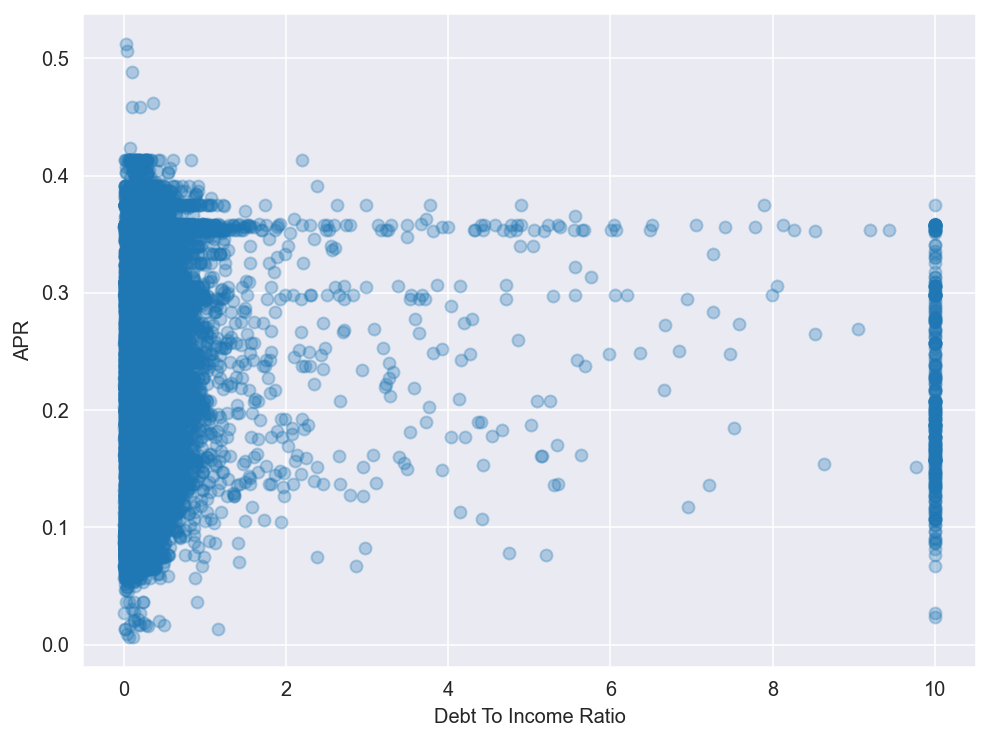

In [65]:
plt.figure(figsize = [8, 6])
plt.scatter(data = main, x = 'DebtToIncomeRatio', y = "BorrowerAPR", alpha = .3)
plt.xlabel('Debt To Income Ratio')
plt.ylabel('APR')
plt.show()

As expected, the lower your debt to income ratio the more likely you'll both get a loan and have a lesser APR. I am interested in why suddenly at the highest ratio there are suddenly a lot more loans.

## How Does Employment Status Affect things?

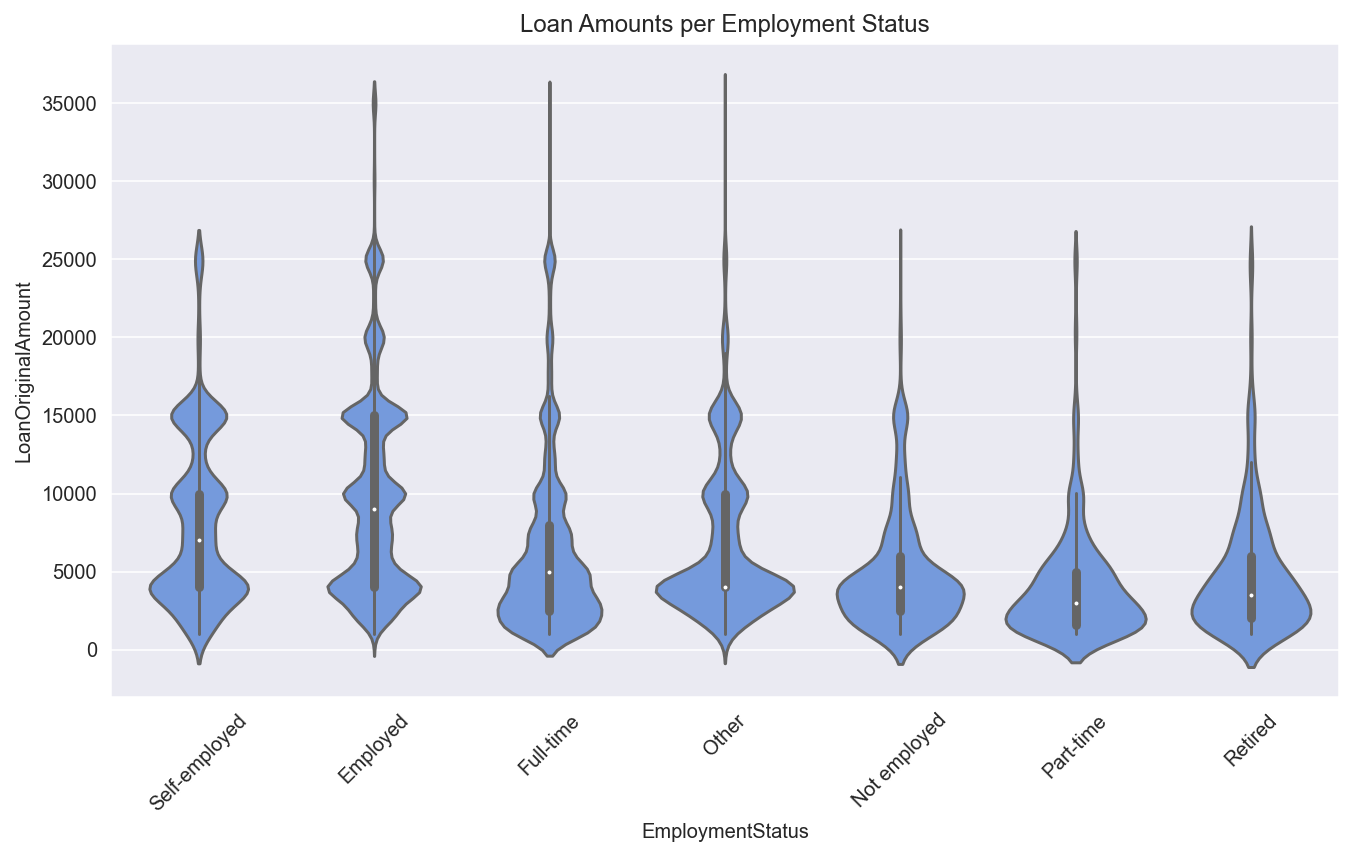

In [98]:
sns.violinplot(x = main.EmploymentStatus, y=main.LoanOriginalAmount, color='cornflowerblue')
plt.title("Loan Amounts per Employment Status")
plt.xticks(rotation=45);

Employment status has little effect on the loan amount. The majority of loans are around $5,000 for all employment groups. It is obvious that that those employed get higher loan amount than their unemployed or retired peers, but not as much as one would assume.

## Has APR gone up over time?

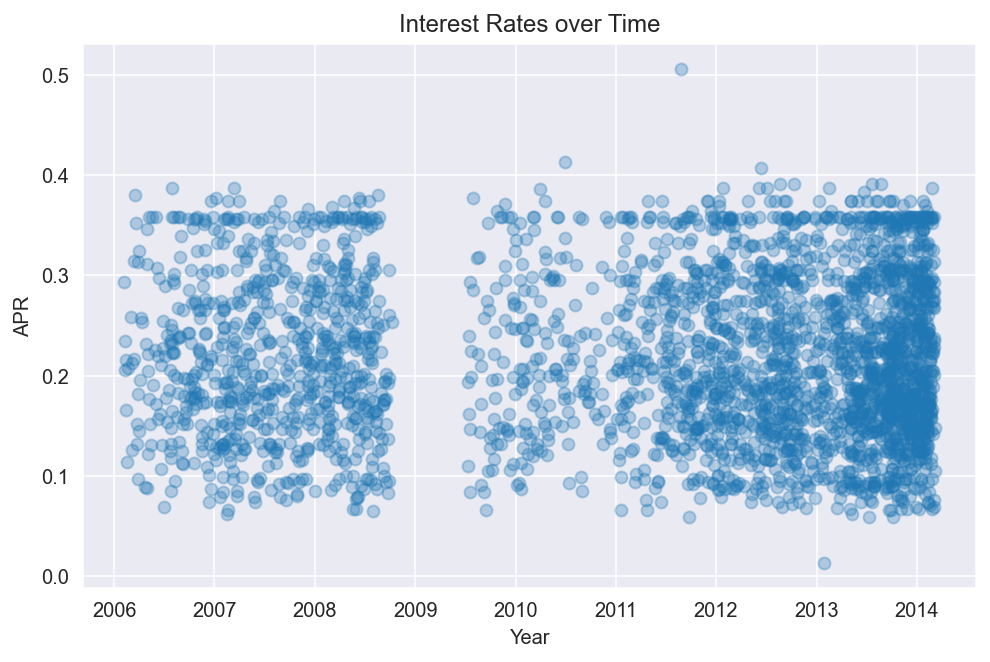

In [67]:
year = main['ListingCreationDate'].sample(n=3000)
apr = main['BorrowerAPR'].sample(n=3000)
  
plt.scatter(year, apr, alpha=.3)
plt.title('Interest Rates over Time')
plt.xlabel('Year')
plt.ylabel('APR')
plt.show()

I'm kind of suprised it more or less stayed the same. Prosper must have found a system that works and stuck with it. Certainly more loans have been added over time as well, but it can be reasonably assumed it's because the company grew over time. I am interested to see why there is a higher concentration of loans at just above 3.5 percent.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> My features of interest are APR and credit ratings. To see that they were so tightly aligned was sort of a suprise. The fact that it's almost a universal step down per credit grade makes me belive that the risk system is heavily based on credit rating more than any other variable. 

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> It was interesting to me that employment status didn't have as much of an effect on anything as one would assume. Across all the categories the majority of the loans were for roughly the same amount and the average amount given didn't change much at all. 

## Multivariate Exploration

## What is the relationship between employment status, credit score, and APR?

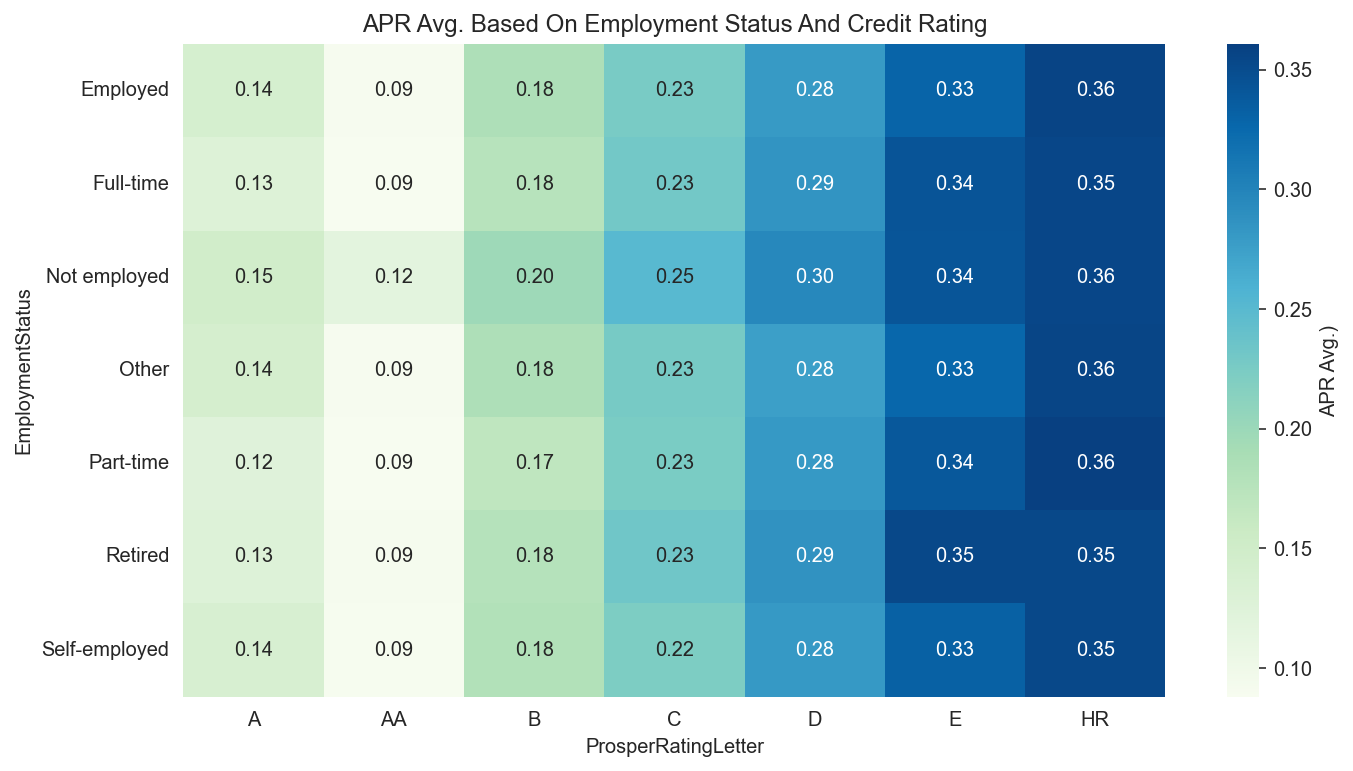

In [99]:
# purpose vs loan amount and credit score or again.
mean = main.groupby(['ProsperRatingLetter', 'EmploymentStatus']).mean()['BorrowerAPR']
mean = mean.reset_index(name = 'Borrower APR Avg.')
mean = mean.pivot(index = 'EmploymentStatus', columns = 'ProsperRatingLetter',
                       values = 'Borrower APR Avg.')
sns.heatmap(mean, annot = True, fmt = '.2f', cbar_kws = {'label': 'APR Avg.)'}, cmap ='GnBu')
plt.title('APR Avg. Based On Employment Status And Credit Rating');

As expected, those with higher credit scores have a lower APR and interest rate. Unexpected, however, is that employment status had almost no effect on the average APR. Even those who were unemployed had only a slightly higher interest rate than their employed peers.

## Question: Does Income Range have any correlation with loan amount or the APR associated with the loan?

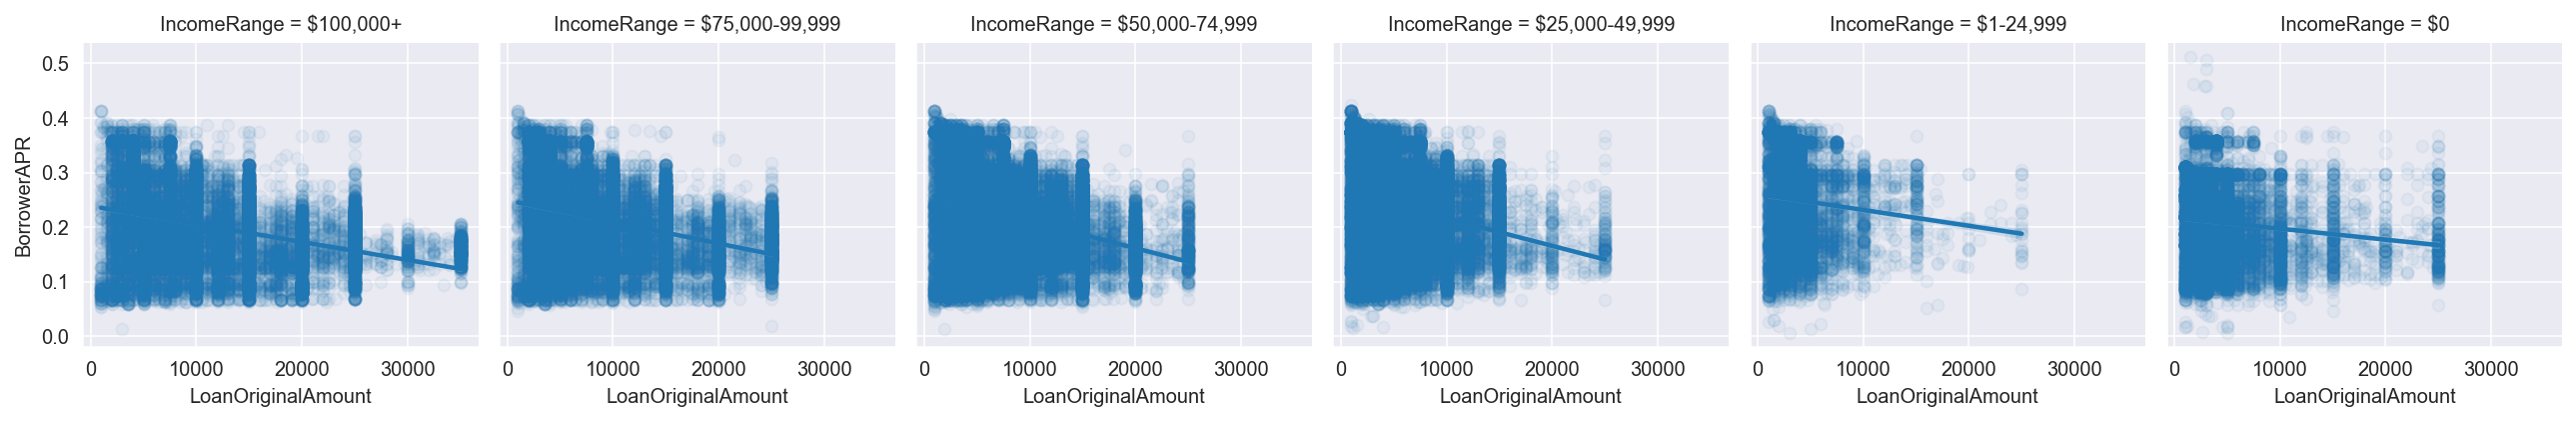

In [108]:
fig = sns.FacetGrid(data=main, col='IncomeRange')
fig.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerAPR', color=colors[0], scatter_kws={'alpha': 0.05});

The loan amounts across the income spectrum remain relatively similar, suprisingly. It is interesting that only the six-figure income group can recieve higher than around average max amount of $25,000.

## Question: Does the loan term length affect any of the previous findings?

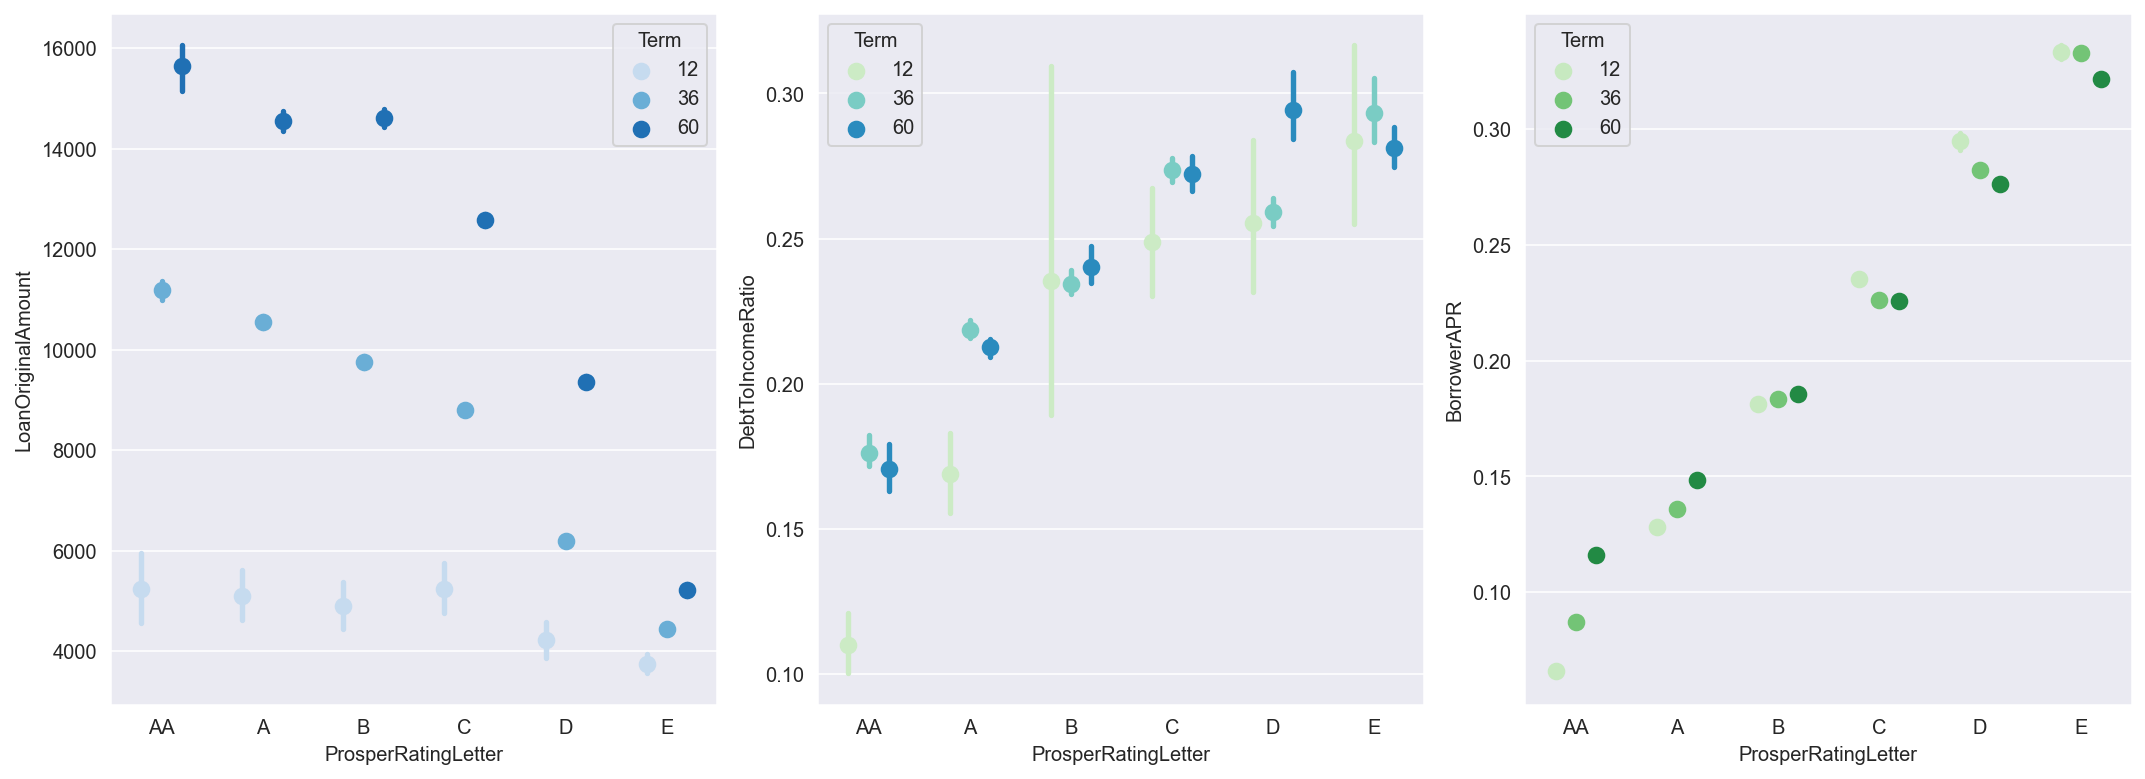

In [122]:
y_columns = ['LoanOriginalAmount','DebtToIncomeRatio', 'BorrowerAPR']
palettes = ['Blues', 'GnBu', 'Greens']

plt.figure(figsize=(15, 5.5))

for col, index, colors in zip(y_columns, range(3), palettes):
    plt.subplot(1, 3, index+1)
    sns.pointplot(data=main, x='ProsperRatingLetter', y=col, hue='Term', 
                  linestyles='', palette= colors, dodge=0.4)
plt.tight_layout();

Again, we see the postive correlation between Debt To Income Ratio and APR. Loan term length doesn't seem to affect these. It's not suprising that the higher the amount the longer it will take someone to pay it back, so it makes sense the higher the amount the longer the term. But the clear divide between them is interesting to see.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The greatest variable that stood out was the term length and the amount given. While it makes sense that more amounts need longer time to be paid off, it's interesting to see such a clear divide between the loan terms. This is the shakiest example of credit rating compared to anything else. Most other variables are almost universally staggered evenly, but in the case of loan amount vs credit rating it wasn't as uniform as previous explorations.

### Were there any interesting or surprising interactions between features?

> This time there wasn't much of a suprise. I figured out fairly quickly in the bivariate analysis that credit rating was one of the strongest categories in regards to both how much you can have and how low your interest could be.

## Conclusions
> Based on this analysis it is clear that credit rating is the highest valued variable in the risk assment process. From a consumer point of view you would need to fix your credit any way possible before taking a loan, or risk ending up in more debt than you started.

> Employment status and income hold far less weight than anticipated. It matters less if you're upper class and employed full time, or lower class and unemployed. It's almost always about your credit score. Higher score equals lower risk to Prosper and other lender. 